<a href="https://colab.research.google.com/github/beratcmn/tensorflow-quickdraw-recognition/blob/main/test_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Since I already created a somewhat successful model, I'll mess around with different models on the same problem.

### Downloading the libaries

In [1]:
!pip install quickdraw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importing the libraries

In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

import numpy as np
from pathlib import Path
from quickdraw import QuickDrawDataGroup
from matplotlib import pyplot as plt

tf.__version__

'2.11.0'

### Getting the doodles

In [3]:
image_size = (64, 64)
categories = ["airplane", "apple", "bicycle", "car", "cat", "cloud", "dog", "hamburger", "fish", "flower", "banana", "bird", "eye", "fork", "hat"]
max_drawings = 3000

def generate_class_images(name, max_drawings, recognized):
    directory = Path("data/" + name)

    if not directory.exists():
        directory.mkdir(parents=True)

    images = QuickDrawDataGroup(name, max_drawings=max_drawings, recognized=recognized)
    for img in images.drawings:
        filename = directory.as_posix() + "/" + str(img.key_id) + ".png"
        img.get_image(stroke_width=3).resize(image_size).save(filename)

for label in categories:
    generate_class_images(label, max_drawings=max_drawings, recognized=True)

downloading airplane from https://storage.googleapis.com/quickdraw_dataset/full/binary/airplane.bin
download complete
loading airplane drawings
load complete
downloading apple from https://storage.googleapis.com/quickdraw_dataset/full/binary/apple.bin
download complete
loading apple drawings
load complete
downloading bicycle from https://storage.googleapis.com/quickdraw_dataset/full/binary/bicycle.bin
download complete
loading bicycle drawings
load complete
downloading car from https://storage.googleapis.com/quickdraw_dataset/full/binary/car.bin
download complete
loading car drawings
load complete
downloading cat from https://storage.googleapis.com/quickdraw_dataset/full/binary/cat.bin
download complete
loading cat drawings
load complete
downloading cloud from https://storage.googleapis.com/quickdraw_dataset/full/binary/cloud.bin
download complete
loading cloud drawings
load complete
downloading dog from https://storage.googleapis.com/quickdraw_dataset/full/binary/dog.bin
download comp

### Creating the datasets

In [4]:
batch_size = 32

train_dataset = image_dataset_from_directory(
    "data",
    validation_split=0.2,
    subset="training",
    seed=123,
    color_mode="grayscale",
    image_size=image_size,
    batch_size=batch_size
)

validation_dataset = image_dataset_from_directory(
    "data",
    validation_split=0.2,
    subset="validation",
    seed=123,
    color_mode="grayscale",
    image_size=image_size,
    batch_size=batch_size
)

Found 45000 files belonging to 15 classes.
Using 36000 files for training.
Found 45000 files belonging to 15 classes.
Using 9000 files for validation.


### Displaying examples

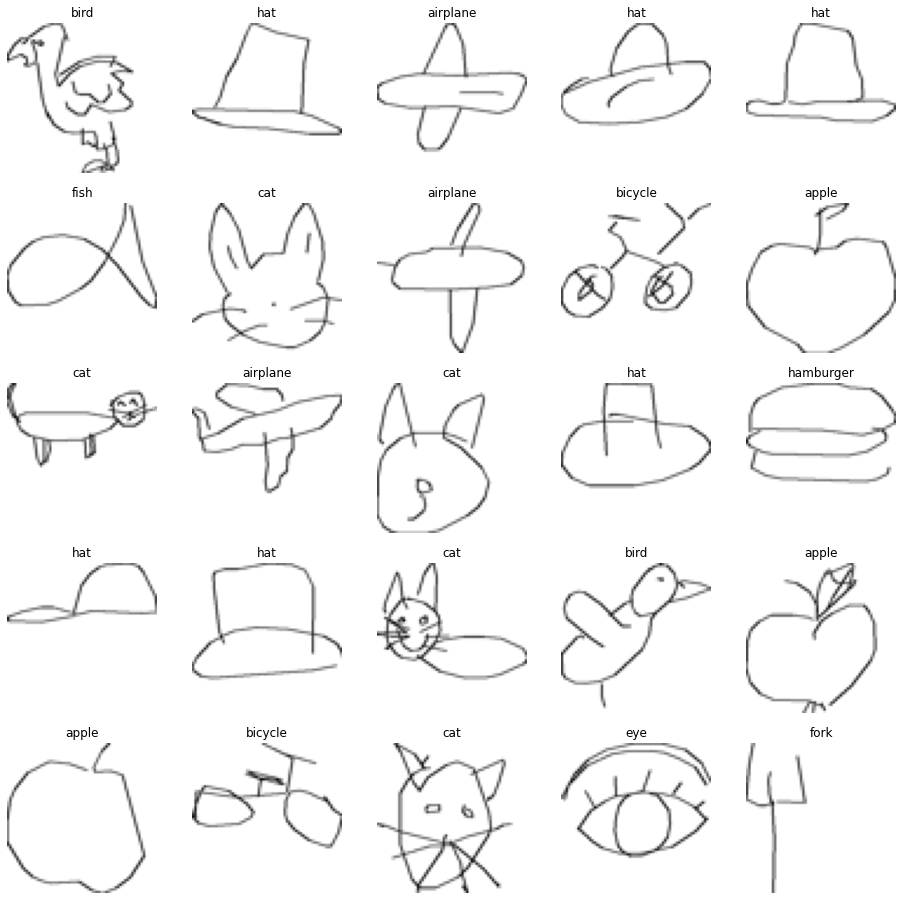

In [5]:
plt.figure(figsize=(16, 16))
for images, labels in train_dataset.take(1):
  for i in range(25):
    plt.subplot(5,5,i+1)
    data = images[i].numpy().astype("uint8")
    plt.imshow(data, cmap='gray', vmin=0, vmax=255)
    plt.title(train_dataset.class_names[labels[i]])
    plt.axis("off")

### Creating a model